# Second term Exam Mechanics of Materials

Let us first load the alumni of this course:

In [1]:
import pandas as pd 
import numpy as np

classlist1 = pd.read_excel("https://www.dropbox.com/s/9khod9m3orvc8jl/MoM%202021%20II%20Asistencia.xlsx?dl=1")
classlist1

,ID,Nombre
0,30000057972,"DÍAZ PÉREZ,DAVID STEVEN"
1,30000025188,"Florez Huerfano,Brandon"
2,30000048970,"GARCIA RODRIGUEZ,ANDRES FELIPE"
3,30000057750,"GRACIA GUERRA,DANIEL FELIPE"
4,30000050481,"IGLESIAS GARCIA,ANDRES FELIPE"
5,30000057155,"JARAMILLO GUTIERREZ,FABIAN ALEJANDRO"
6,30000048121,"PARRA MADRIGAL,JUAN GILBERTO"
7,30000043745,"PORTILLA HURTADO,JUAN PABLO"
8,30000057974,"PÉREZ CASTRILLÓN,NICOLÁS"
9,30000049983,"ROMERO REY,CRISTIAN ALEXANDER"


In [2]:
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols
def solve_beam(Ft, Lt, Fp, LFp, M, L_M, Fr, L_Fr): # $F_t$	Lt	Fp	LFp	M	L_M	Fr	L_Fr0
  E, I = symbols('E, I')
  b = Beam(6, E, I)
  b.apply_support(0, "pin")
  b.apply_support(4, "roller")
  R_0, R_4 = symbols('R_0, R_4')
  b.apply_load(Fp, LFp, -1) # Force
  b.apply_load(M, L_M, -2) # Moment
  b.apply_load(Fr, L_Fr, 0, 6) # Rectangular force
  b.apply_load(Ft, 0, 1, Lt) # Triangle Force
  b.solve_for_reaction_loads(R_0, R_4)
  p = b.draw()
  p.show()
  b.plot_bending_moment()
  b.plot_shear_force()
  return 


## Bending Design Exercise

Consider the previous diagram. There is a triangular proportional load at the beginning with a magnitude of $F_t$ kN of $L_t$ distance from the beginning of the beam. Later an specific load $F_p$ is applied at $L_{F_p}$ from the left. A pure moment $M$ is applied at $L_M$ from the left. Finally, a rectangular distributed load is applied from $L_{R_0}$ up to the end of the beam with a magnitude $F_R$. Consider the total distance of the beam as 6 m. There are two support reactions, one pinned at the beginning and the other, located at $4m$.

The objective is to select the most economical wide-flange section (meaning economical as the lighter), thus do the following:



1.   Draw the Shear and bending moment diagrams.
2.   Obtain the $S$ modulus according to the allowed normal stress $\sigma_{all}=160MPa$.
3. Select at least 4 options that satisfy the requirements of design. 
4. Propose the best option from the table of the book.

Consider the following values expressed in meters ($m$), kN.m for torque, kN and $\frac{kN}{m}$ for forces.



In [3]:
not_lock = False
list_ben = classlist1.copy()
if not_lock:
    list_ben['$F_t$'] = np.random.choice(np.arange(6,12,1), 16) #kN/m
    list_ben['Lt'] = np.random.choice(np.arange(1,4,1), 16) #m
    list_ben['Fp'] = np.random.choice(np.arange(6,12,10), 16) #kN
    list_ben['LFp'] = np.random.choice(np.arange(2,6,1), 16) #m
    list_ben['M'] = np.random.choice(np.arange(40,80,10), 16) #kN
    list_ben['L_M'] = np.random.choice(np.arange(1,5,1), 16) #m
    list_ben['Fr'] = np.random.choice(np.arange(6,12,10), 16) #kN
    list_ben['L_Fr0'] = np.random.choice(np.arange(3,5,1), 16) #m
    list_ben.to_csv("List_ben.csv")
else:
    list_ben = pd.read_csv("List_ben.csv", index_col=0)
list_ben

,ID,Nombre,$F_t$,Lt,Fp,LFp,M,L_M,Fr,L_Fr0
0,30000057972,"DÍAZ PÉREZ,DAVID STEVEN",11,2,6,3,60,1,6,4
1,30000025188,"Florez Huerfano,Brandon",6,3,6,5,60,4,6,3
2,30000048970,"GARCIA RODRIGUEZ,ANDRES FELIPE",8,3,6,4,70,3,6,3
3,30000057750,"GRACIA GUERRA,DANIEL FELIPE",10,3,6,2,70,1,6,4
4,30000050481,"IGLESIAS GARCIA,ANDRES FELIPE",6,2,6,5,40,2,6,3
5,30000057155,"JARAMILLO GUTIERREZ,FABIAN ALEJANDRO",11,1,6,3,70,4,6,4
6,30000048121,"PARRA MADRIGAL,JUAN GILBERTO",10,3,6,2,40,3,6,3
7,30000043745,"PORTILLA HURTADO,JUAN PABLO",8,1,6,4,50,4,6,4
8,30000057974,"PÉREZ CASTRILLÓN,NICOLÁS",6,2,6,2,70,1,6,4
9,30000049983,"ROMERO REY,CRISTIAN ALEXANDER",7,3,6,2,40,3,6,3


Solving the shear and moment diagrams with the sympy tool:



Solving diagrams for DÍAZ PÉREZ,DAVID STEVEN


/home/nikorose/Workspace/Anaconda3/lib/python3.8/site-packages/sympy/plotting/plot.py:1376: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(**a)


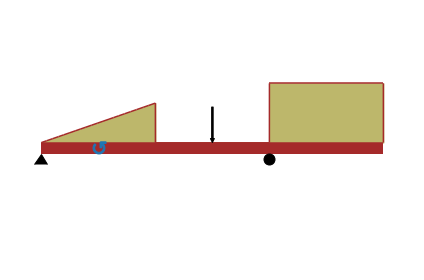

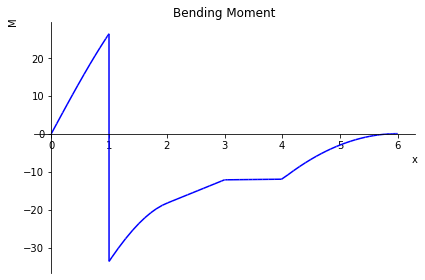

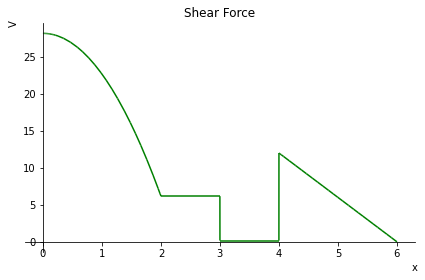

Solving diagrams for Florez Huerfano,Brandon


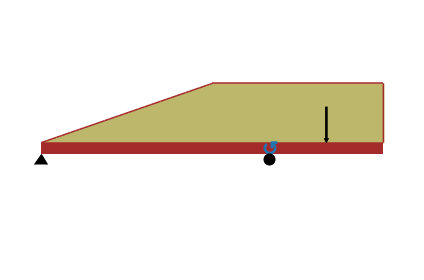

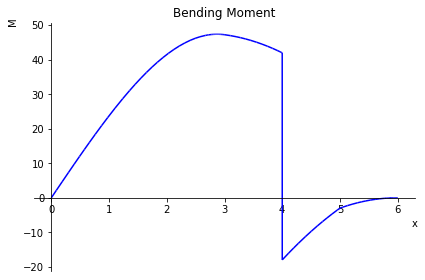

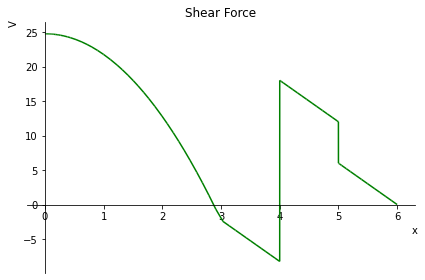

Solving diagrams for GARCIA RODRIGUEZ,ANDRES FELIPE


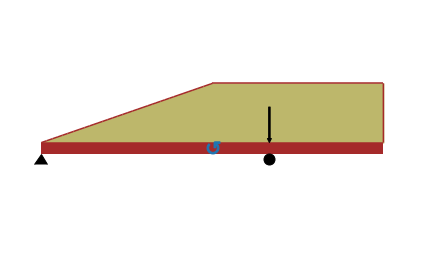

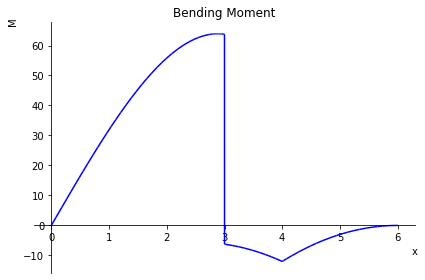

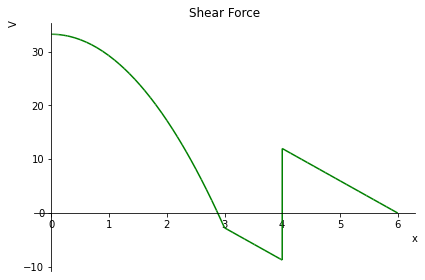

Solving diagrams for GRACIA GUERRA,DANIEL FELIPE


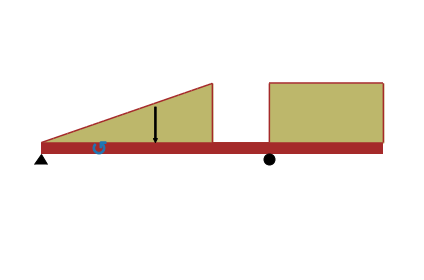

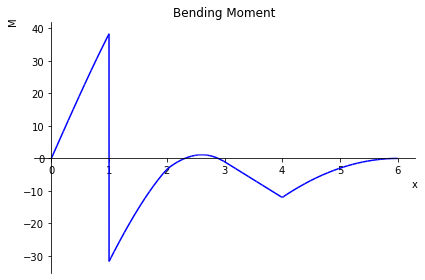

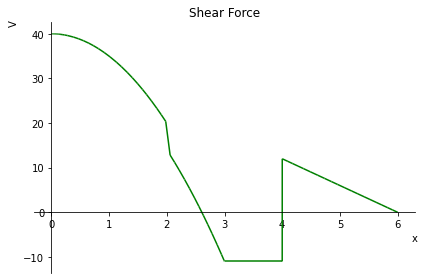

Solving diagrams for IGLESIAS GARCIA,ANDRES FELIPE


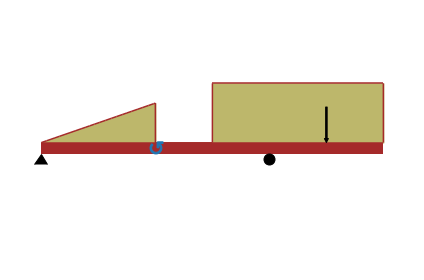

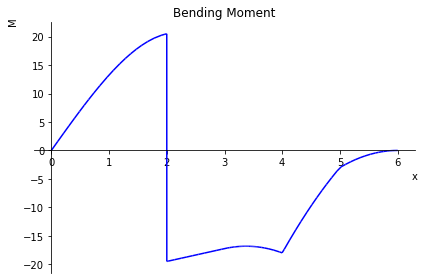

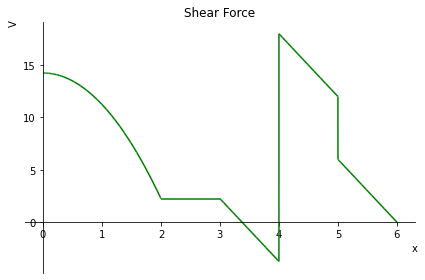

Solving diagrams for JARAMILLO GUTIERREZ,FABIAN ALEJANDRO


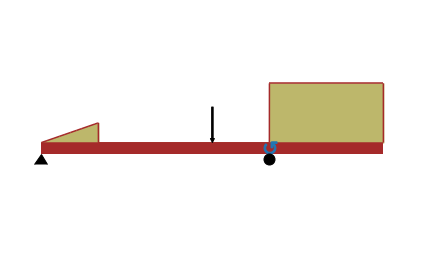

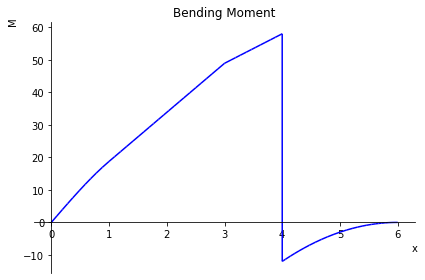

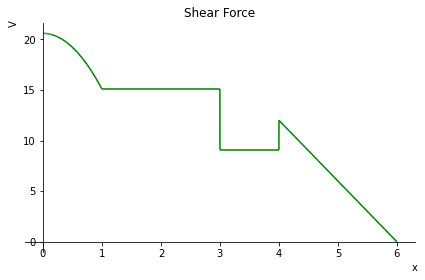

Solving diagrams for PARRA MADRIGAL,JUAN GILBERTO


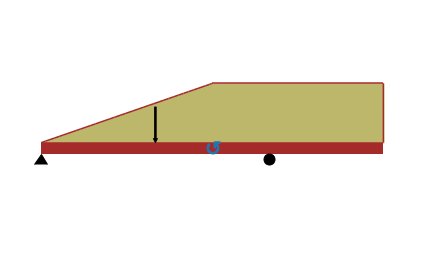

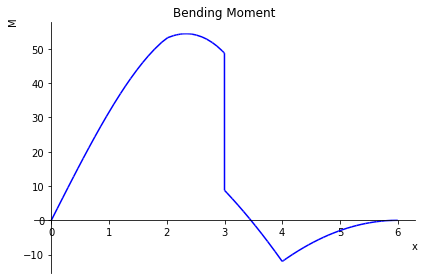

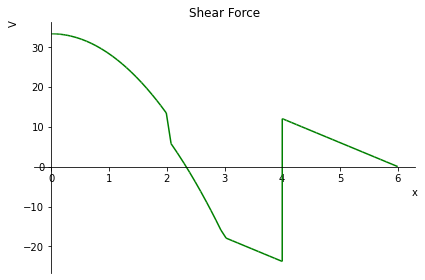

Solving diagrams for PORTILLA HURTADO,JUAN PABLO


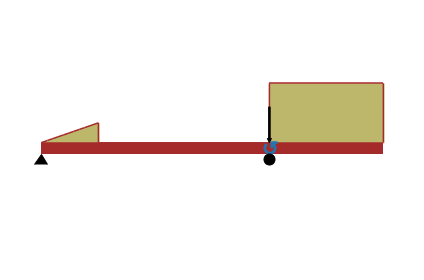

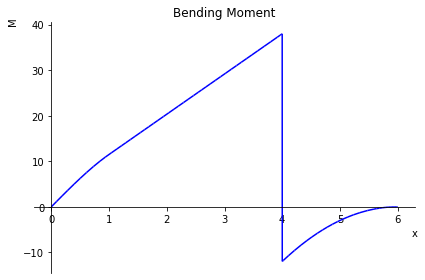

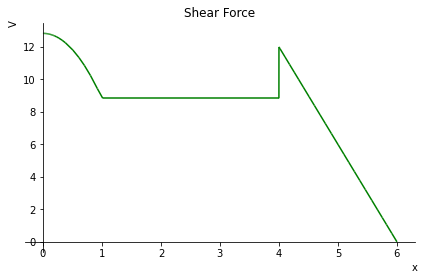

Solving diagrams for PÉREZ CASTRILLÓN,NICOLÁS


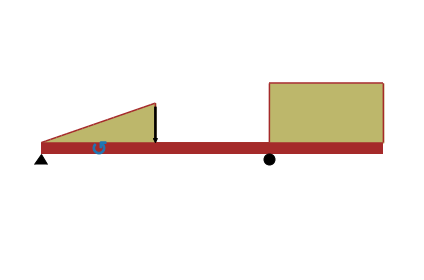

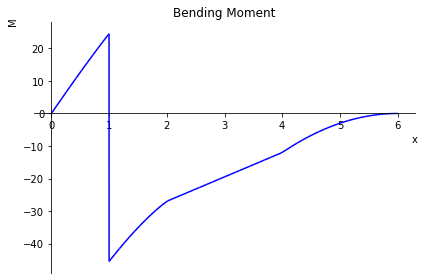

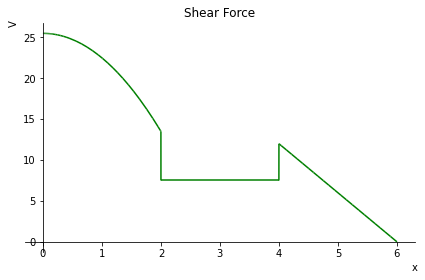

Solving diagrams for ROMERO REY,CRISTIAN ALEXANDER


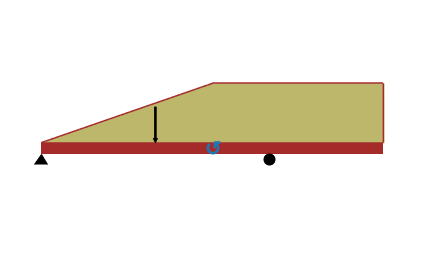

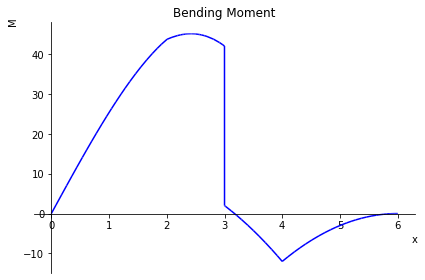

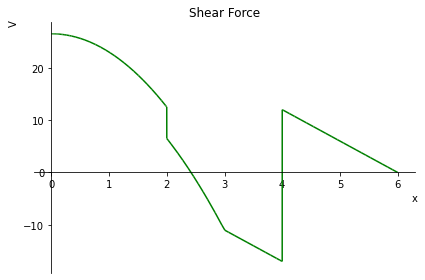

Solving diagrams for SALGADO DÍAZ,ALLEN SANTIAGO


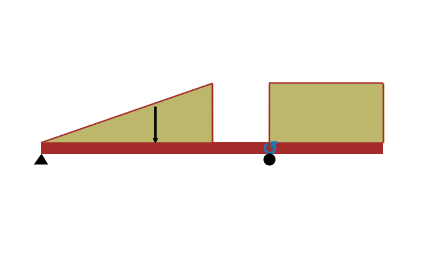

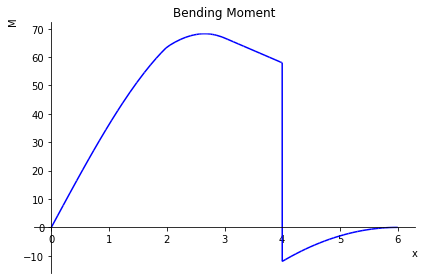

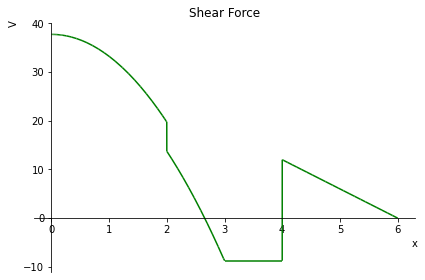

Solving diagrams for SANCHEZ GALVIS,JUAN DAVID


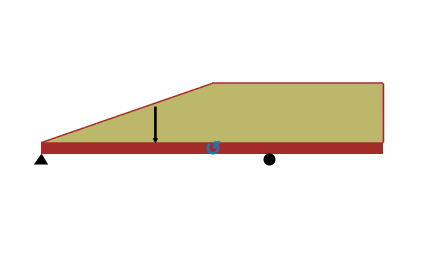

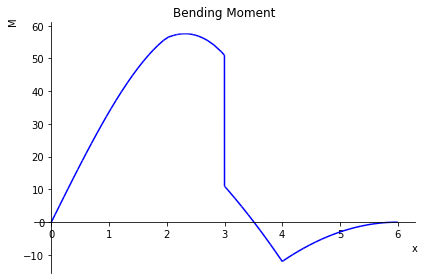

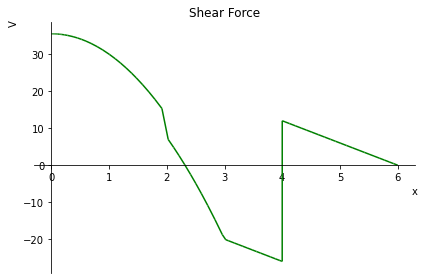

Solving diagrams for SUAREZ FORERO,ANDERSON GIOVANY


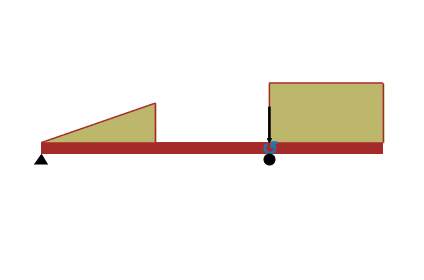

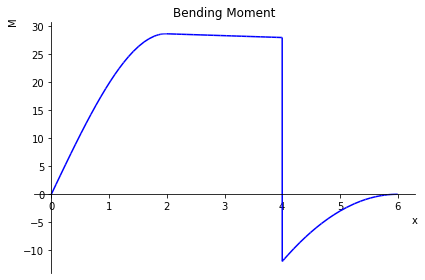

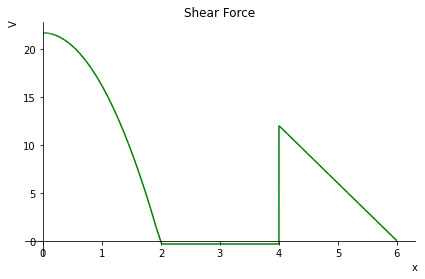

Solving diagrams for VAQUEN MARQUEZ,DANIEL CAMILO


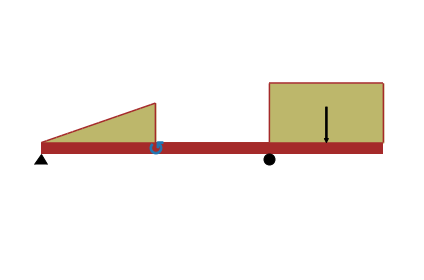

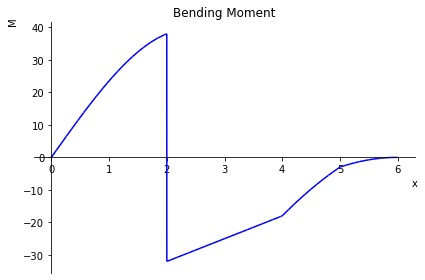

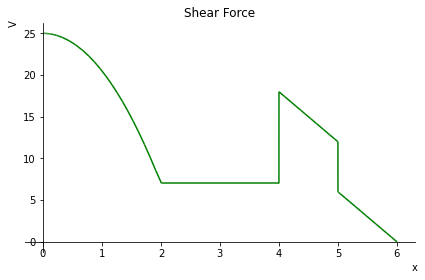

Solving diagrams for VILLAMIL TORRES,JORGE ELIECER ALFREDO


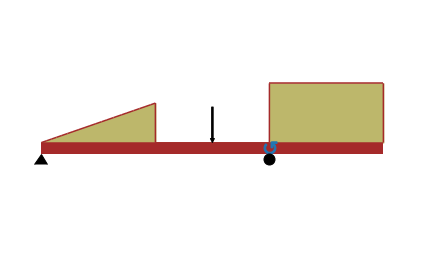

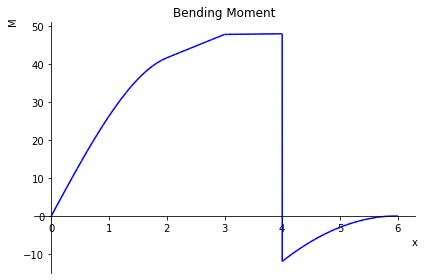

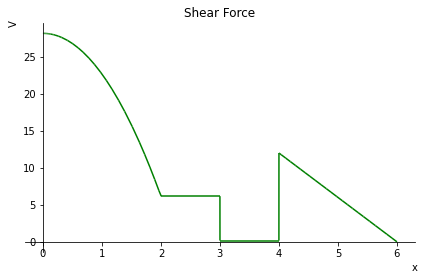

Solving diagrams for Vargas Rodriguez,Cristian Camilo


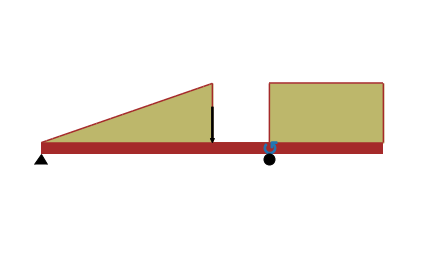

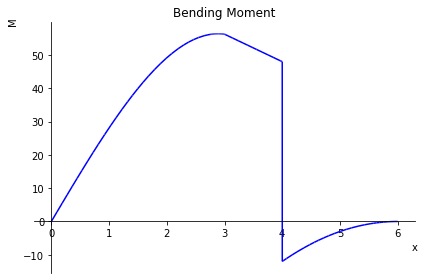

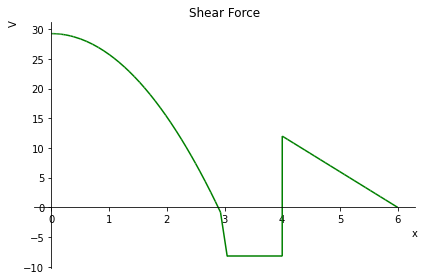

In [4]:
info= {}
for ind in list_ben.index:
  nombre = list_ben.loc[ind, 'Nombre']
  print("Solving diagrams for {}".format(nombre))
  out = solve_beam(*list(list_ben.loc[ind, '$F_t$':].values))
  info.update({nombre: out})

In [5]:
info

{'DÍAZ PÉREZ,DAVID STEVEN': None,
 'Florez Huerfano,Brandon': None,
 'GARCIA RODRIGUEZ,ANDRES FELIPE': None,
 'GRACIA GUERRA,DANIEL FELIPE': None,
 'IGLESIAS GARCIA,ANDRES FELIPE': None,
 'JARAMILLO GUTIERREZ,FABIAN ALEJANDRO': None,
 'PARRA MADRIGAL,JUAN GILBERTO': None,
 'PORTILLA HURTADO,JUAN PABLO': None,
 'PÉREZ CASTRILLÓN,NICOLÁS': None,
 'ROMERO REY,CRISTIAN ALEXANDER': None,
 'SALGADO DÍAZ,ALLEN SANTIAGO': None,
 'SANCHEZ GALVIS,JUAN DAVID': None,
 'SUAREZ FORERO,ANDERSON GIOVANY': None,
 'VAQUEN MARQUEZ,DANIEL CAMILO': None,
 'VILLAMIL TORRES,JORGE ELIECER ALFREDO': None,
 'Vargas Rodriguez,Cristian Camilo': None}

## Torsion problem

Shaft AB consists of $n$ homogeneous cylindrical elements, which can be solid or hollow. Its end A is fixed, while its end B is free, and it is subjected to the loading shown. The length of element i is denoted by $L_i$, its outer diameter by $OD_i$, its inner diameter by $ID_i$, its modulus of rigidity by $G_i$ and must be look in the material properties tables from the book, and the torque applied to its right end by $T_i$, the magnitude $T_i$ of this torque being assumed to be positive if Ti is counterclockwise from end B and negative other- wise. (Note that $ID_i = 0$ if the element is solid.) Obtain: 


1.   The  angle of twist of each element
2.   maximum shearing stress in each element
3.   The angle of twist from its base to this end.

![ima1](https://www.dropbox.com/s/n5pay0zge69uztc/torsion_exam_ex.png?dl=1)

In [6]:
not_lock = False
list_tor = classlist1.copy()
if not_lock:
    max_elem= 4
    num_elements = np.random.choice(np.arange(3,max_elem), 16)
    for i in range(max_elem-1):
        list_tor['L_{}'.format(i)] = np.nan #m
        list_tor['OD_{}'.format(i)] = np.nan # mm
        list_tor['ID_{}'.format(i)] = np.nan # mm
        list_tor['T_{}'.format(i)] = np.nan # Nm
        list_tor['Mat_{}'.format(i)] = np.nan 
    for k,i in enumerate(num_elements):
        for j in range(i):
          list_tor.loc[k,'L_{}'.format(j)] = np.random.choice(np.arange(100,400, 50))  #m
          list_tor.loc[k,'OD_{}'.format(j)] = np.random.choice(np.arange(60,120, 10))# mm
          list_tor.loc[k,'ID_{}'.format(j)] = np.random.choice(np.arange(0, 50, 10)) # mm
          list_tor.loc[k,'T_{}'.format(j)] = np.random.choice(np.arange(800, 1600, 200)) # Nm
          list_tor.loc[k,'Mat_{}'.format(j)] = np.random.choice(['Aluminum', 'Steel 308', 'Brass'])
    list_tor.to_csv("List_tor.csv")
else:
    list_tor = pd.read_csv("List_tor.csv", index_col=0)
list_tor

,ID,Nombre,L_0,OD_0,ID_0,T_0,Mat_0,L_1,OD_1,ID_1,T_1,Mat_1,L_2,OD_2,ID_2,T_2,Mat_2
0,30000057972,"DÍAZ PÉREZ,DAVID STEVEN",350.0,110.0,10.0,1400.0,Steel 308,150.0,100.0,20.0,800.0,Aluminum,350.0,90.0,30.0,1200.0,Steel 308
1,30000025188,"Florez Huerfano,Brandon",100.0,60.0,0.0,1000.0,Steel 308,150.0,70.0,30.0,1200.0,Aluminum,200.0,90.0,40.0,1000.0,Aluminum
2,30000048970,"GARCIA RODRIGUEZ,ANDRES FELIPE",250.0,90.0,40.0,1400.0,Brass,150.0,90.0,0.0,800.0,Aluminum,300.0,110.0,10.0,1400.0,Steel 308
3,30000057750,"GRACIA GUERRA,DANIEL FELIPE",300.0,60.0,20.0,800.0,Aluminum,100.0,80.0,0.0,1400.0,Aluminum,200.0,80.0,0.0,1400.0,Aluminum
4,30000050481,"IGLESIAS GARCIA,ANDRES FELIPE",100.0,60.0,20.0,1000.0,Aluminum,150.0,70.0,20.0,800.0,Aluminum,250.0,70.0,10.0,1200.0,Aluminum
5,30000057155,"JARAMILLO GUTIERREZ,FABIAN ALEJANDRO",350.0,60.0,40.0,800.0,Steel 308,200.0,110.0,0.0,1200.0,Brass,150.0,90.0,20.0,800.0,Aluminum
6,30000048121,"PARRA MADRIGAL,JUAN GILBERTO",100.0,80.0,30.0,1000.0,Aluminum,150.0,100.0,20.0,1000.0,Aluminum,350.0,110.0,0.0,1000.0,Brass
7,30000043745,"PORTILLA HURTADO,JUAN PABLO",150.0,110.0,10.0,1400.0,Aluminum,200.0,110.0,0.0,1400.0,Steel 308,150.0,110.0,20.0,800.0,Steel 308
8,30000057974,"PÉREZ CASTRILLÓN,NICOLÁS",150.0,100.0,40.0,1200.0,Brass,100.0,80.0,0.0,1000.0,Aluminum,300.0,80.0,0.0,1400.0,Aluminum
9,30000049983,"ROMERO REY,CRISTIAN ALEXANDER",300.0,110.0,0.0,1400.0,Brass,250.0,60.0,10.0,1200.0,Brass,350.0,80.0,10.0,1400.0,Aluminum


/home/nikorose/Workspace/Anaconda3/lib/python3.8/site-packages/sympy/plotting/plot.py:1376: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(**a)


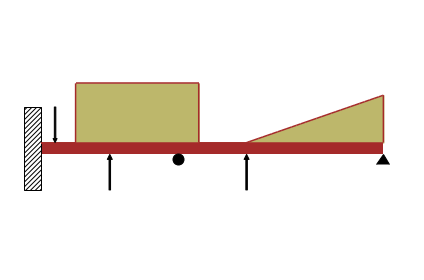

IndexError: tuple index out of range